 
## 95-791 Data Mining (Fall 2021) 
### Name: Abdullah Ahmad

### Topics covered in this Lab:
Linear and Polynomial Regression with scikit-learn
Ridge and Lasso Regression
Cross Validation


### Changing the author field and file name.

 (a) Change the `name:` field on the Rmd document from Your Name Here to your own name.

 (b) Rename this file to "Lab2_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.datasets import load_diabetes
%matplotlib inline
plt.style.use('seaborn-white')

### 1. Data Processing

> For Lab you might want to have your lecture slides and the ISRL textbook (An Introduction to Statistical Learning) open (Chapters 3, 4, and 6) as you go through the exercises. 


In today's Lab we are going to switch from using statsmodels to [scikitlearn](https://scikit-learn.org/stable/). Scikit-learn works with vectors rather than formulas to compute our models. Follow along the next exercises to learn more.


**1)a) Begin by loading a dataset from scikit-learn called [`Diabetes`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) into a dataframe called `diabetes_data`. Print the DESCR of the dataset.**


In [3]:
diabetes_data = load_diabetes()
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

**1)b) How many feautres does this dataset have? What does the target variable represent in this dataset?**

--> 10 features

**1)c) Pick any of the predictors and graph it against the target variable. Use regplot() for this and describe the relationship between those two variables.**

In [4]:
df = pd.DataFrame(diabetes_data.data)
df.columns = diabetes_data.feature_names
df['d_progression'] = pd.DataFrame(diabetes_data.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,d_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


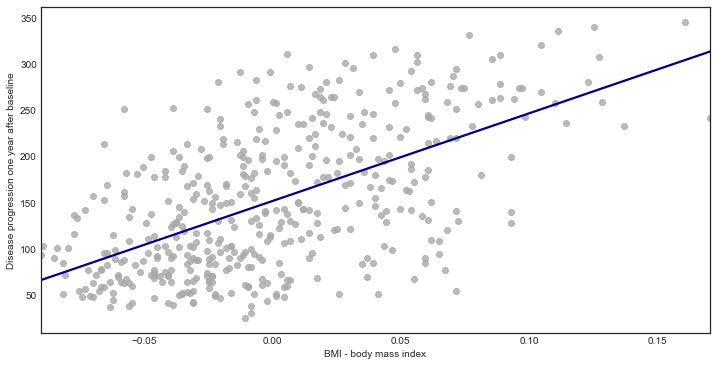

In [5]:
sns.axes_style("whitegrid") 
plt.figure(figsize=(12,6))
lmplot = sns.regplot(x="bmi",y="d_progression",data=df, ci=None, order=1, 
            scatter_kws={"color": "darkgrey"}, line_kws={"color": "darkblue"})
lmplot.set(xlabel='BMI - body mass index', 
           ylabel='Disease progression one year after baseline')
plt.show(lmplot)

--> BP is positively coorelated to target.

**1)d) Either split your dataframe into `X` and `y` or re-load the [`Diabetes`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) dataset into X and y variables. Print your taget variable.**


In [6]:
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)
print(diabetes_X)
print(diabetes_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

**1)d) During the lectures we talked about spliting our dataset into training and testing so that we can validate our models. One easy way of doing this is using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn. Split your `X` and `y` from the diabetes dataset into `X_train`, `X_test`, `y_train` and `y_test`. Use a 75-25 ratio for the split and a random_state=1. Print out your y_test.**

**Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=your_number, random_state=your_number)

In [20]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, 
                                                                                test_size=0.25, random_state=1)
diabetes_y_test

array([ 78., 152., 200.,  59., 311., 178., 332., 132., 156., 135., 220.,
       233.,  91.,  51., 195., 109., 217.,  94.,  89., 111., 129., 181.,
       168.,  97., 115., 202.,  84., 147., 253., 144., 262., 115.,  68.,
        65., 252., 212., 142., 215., 180., 163., 151., 283.,  66.,  83.,
       214., 189., 302.,  93., 178., 241.,  52., 144., 102., 200., 232.,
        97., 109.,  55.,  63.,  98.,  88., 233., 235.,  97., 243.,  59.,
       138., 220., 137.,  72., 109.,  71.,  74., 219., 196., 170., 199.,
        71., 155.,  52.,  63.,  88.,  97., 100.,  64., 107.,  49.,  60.,
       346., 104., 259., 143., 190., 104.,  77., 141., 214.,  51., 175.,
       167.,  90.,  39., 160., 101., 180.,  69., 281., 281., 214.,  96.,
       146.])

---

### 2. Linear and Plynomial Regression with Scikit-Learn

Linear Regression with scikit-learn requires you to have your data in vector (array) form rather than formulas (like statsmodels. Look at the steps below to get an idea.

We import LinearRegression from scikit-learn:
```
from sklearn.linear_model import LinearRegression
```

Most models on scikit-learn are python classes, which means we'll have to create an object of this class, and we'll have access to its attributes and methods.
```
lm = LinearRegression()
```

The next step is fitting our dataset to our `lm` model. So far its just an empty object of class LinearRegression. Pretend we already have a dataset `df` with all our data. We need to separate our dataset into `X` and `y` before fitting it to our model.
```
X = df.drop(['y'],axis=1)
y = df['y']
```

Once separated we can use our `X` and `y` in our `lm` model:
```
lm.fit(X,y)
```

From the documentation of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) you'll see that there are a few methods associated with this class:
- fit(X, y[, sample_weight])
- get_params([deep])
- predict(X)
- score(X, y[, sample_weight])
- set_params(**params)

As well as a few attributes:
- coef_
- rank_
- singular_
- intercept_
- n_features_in_
- feature_names_in_

There are also parameters you can modify when creating your object from class LinearRegression.


**2)a) Use your diabetes training dataset to fit them into a LinearRegression (with scikit-learn) and print out the coeficients of your model.**

In [21]:
lm = LinearRegression()
lm.fit(diabetes_X_train,diabetes_y_train)
print(lm.coef_)

[  -7.85951708 -245.05253542  575.11667591  323.85372717 -519.77447335
  250.61132753    0.96367294  180.50891964  614.75959394   52.10619986]


**2)b) You can calculate the $R^2$ of your model by using the method `score` from LinearRegression. Use your model from 2)a) to print out the $R^2$ of your training set and the  $R^2$ of your testing set.**

In [22]:
print("Training R-squared: ", lm.score(diabetes_X_train,diabetes_y_train))
print("Testing R-squared: ", lm.score(diabetes_X_test,diabetes_y_test))


Training R-squared:  0.535916157695912
Testing R-squared:  0.4439741326507922


**2)c) How good is your model based on your answer from 2)b)?**

--> R^2 explains the variance in y that is caused by variance in X. 

**2)d) Use the [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) method (package already imported) to calculate your training and testing MSE.**

**Hint: You'll have to calculate the predicted values of your model, both with your train and test datasets, and then calcualte their corresponding MSEs.

In [23]:
diabetes_train_pred = lm.predict(diabetes_X_train)
diabetes_test_pred = lm.predict(diabetes_X_test)

print('Training Mean squared error: %.2f'% mean_squared_error(diabetes_y_train, diabetes_train_pred))
print('Testing Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_test_pred))

Training Mean squared error: 2857.98
Testing Mean squared error: 2903.10


**2)e) Let's now try a polynomial regression with scikit-learn. We must first transform our X's into [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Follow the instructions below and print the coeficients and the test MSE for your polynomial regression (degree=3) model.**

Polynomial features is a python class, therefore we must create an object of this class. When creating this object we must specify the degrees of our polynomial. 
```
poly_model = PolynomialFeatures(degree=your_degree)
```

Once we have our model, we must transform our X's into polynomial form
```
X_poly_train = poly_model.fit_transform(diabetes_X_train)
```

After this step you can follow the same steps as your LinearRegression model. The difference is that you'll plug in your transformed polynomial features instead of your X_train or X_test.


In [24]:
poly_model = PolynomialFeatures(degree=3)

X_poly_train = poly_model.fit_transform(diabetes_X_train)
X_poly_test = poly_model.fit_transform(diabetes_X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_poly_train, diabetes_y_train)
diabetes_y_pred_poly = lm_poly.predict(X_poly_test)

print('Coefficients:', lm_poly.coef_)
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test, diabetes_y_pred_poly))

Coefficients: [ 5.26092340e+16 -1.92640787e+04 -1.84225084e+05  4.28975152e+04
  9.14909032e+04 -1.13910802e+06  7.14631255e+05  7.25892448e+05
  1.15459369e+05  4.01433287e+05  6.68821124e+04 -4.87611112e+03
 -3.73319891e+03 -1.51253986e+04  1.16912092e+04 -4.41134723e+06
  3.89928163e+06  1.62118140e+06 -3.05198306e+04  1.42529191e+06
  9.29516383e+02 -1.11222912e+03 -1.58739669e+04  5.25004681e+02
 -4.25024775e+07  3.73473521e+07  1.58837211e+07  3.81539266e+02
  1.39892718e+07  1.21876912e+04 -7.26324924e+03  1.45610660e+04
  9.51780093e+06 -8.39961352e+06 -3.51749883e+06  6.64864847e+04
 -3.13518202e+06  2.12140653e+04 -6.93335882e+03  2.10017364e+07
 -1.84408695e+07 -7.86164537e+06 -9.87662021e+03 -6.90187564e+06
 -1.33677383e+04 -1.18305782e+07 -4.44538326e+07  7.74844882e+07
  2.54467066e+07  1.78212380e+07  1.52632919e+07  4.82076559e+07
 -4.37346533e+07 -2.24278498e+07  5.83323920e+06 -1.34108806e+07
 -2.72785992e+07 -9.40951385e+06 -2.92735567e+07 -5.70022640e+06
  1.0717517

**2)f) Is your test MSE from 2)e) any better than the one obtained in 2)d)?**

-->For the polynominal fit SME fit is worse.It is  because it is predicting from one variable to the next variable in all 3 degrees. 

---

### 3. Ridge and Lasso Regression

Now that you have warmed up let the fun begin! We will start by looking at Ridge and Lasso Regression. In scikit-learn there are a few ways to compute Lasso Regression and Ridge Regression. For this exercise focus on the following:

- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)
- [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

The `CV` at the end of Ridge or Lasso means that this model has cross-validation incorporated into its model objects. Therefore the alphas will be internally computed through cross-validation in these classes.

*Note: For section you may take the boston dataset or the diabetes dataset.*

In [25]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

**3)a) For this first exercise with Ridge regression we are going to apply Ridge() model to the Diabetes dataset. Please complete the code below to iterate through different values of `alpha` and store the values of the errors and coefficients for each alpha.**

Steps:
- Declare a model with Ridge(). This is the same way we would do it with LinearRegression() model
- Fit the model
- Use the model to make predictions
- Store values of model.coef_ for coefficients
- Store the MSE in errors by using the metric `mean_square_error(,)`

In [26]:
model_ridge = Ridge()
coeficents = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(diabetes_X_train, diabetes_y_train)
    coeficents.append(model_ridge.coef_)
    errors_train.append(mean_squared_error(diabetes_y_train,model_ridge.predict(diabetes_X_train)))
    errors_test.append(mean_squared_error(diabetes_y_test,model_ridge.predict(diabetes_X_test)))

**3)b) Plot the coefficients and errors you collected in the previous question. You should generate two plots, one of coefficients vs alphas, and another one of MSE (both train and test) vs alphas. You can take inspiration from this [example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_coeffs.html#sphx-glr-auto-examples-linear-model-plot-ridge-coeffs-py).**

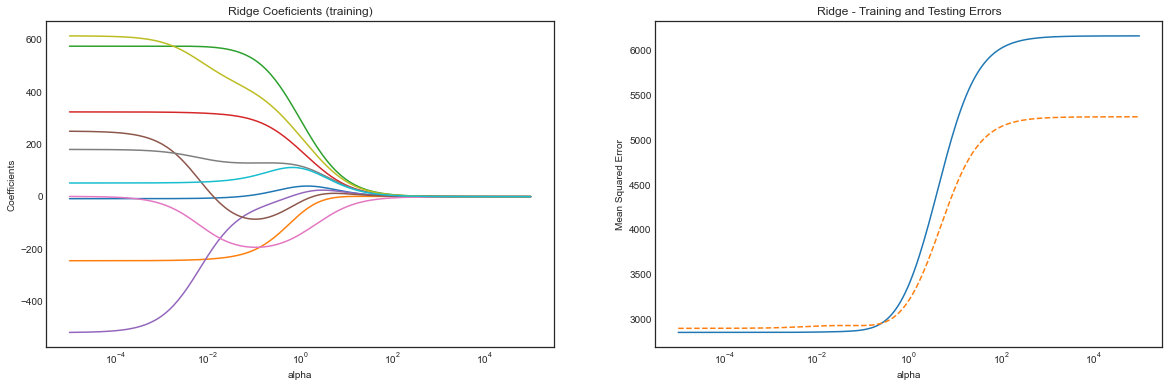

In [27]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge - Training and Testing Errors')
plt.axis('tight')

plt.show()

**2)c) The graphs resemble the ones we talked about in class. What can you comment about these graphs? What seems to be a reasonable value for alpha?**

--> As alpha gets larger the better the tuning of the regression; it converges to 0. Best alpha is at 10^-1 as error for testing rises significantly  


**2)d) Repeat a),b) and c) for Lasso(). Do you see any differences (compared to Ridge) when looking at the graphs?**

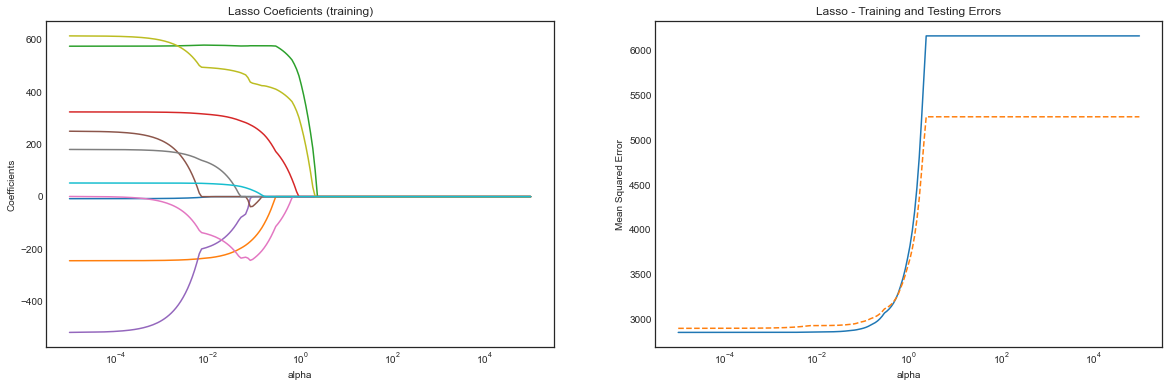

In [28]:
model_lasso = Lasso()
coeficents = []
errors_train = []
errors_test = []

alphas = np.logspace(-5, 5, 200)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(diabetes_X_train, diabetes_y_train)
    coeficents.append(model_lasso.coef_)
    errors_train.append(mean_squared_error(diabetes_y_train,model_lasso.predict(diabetes_X_train)))
    errors_test.append(mean_squared_error(diabetes_y_test,model_lasso.predict(diabetes_X_test)))

plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coeficients (training)')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_train,linestyle="-", label="Train")
ax.plot(alphas, errors_test,linestyle="--", label="Test")
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso - Training and Testing Errors')
plt.axis('tight')

plt.show()

--> The best alpha is at 10^0. The differences are the steeper increase in error from the two verisons. 

**2)e) For this question use the CV version of Ridge (with a cv=10) to model your same dataset. How good is this model for your dataset?**

In [29]:
X, y = diabetes_data.data, diabetes_data.target
feature_names=diabetes_data.feature_names


model_ridgeCV = RidgeCV(cv=10).fit(diabetes_X_train, diabetes_y_train)


coefficients=pd.DataFrame(diabetes_data.feature_names,columns=["feature"])
coefficients["values"] = model_ridgeCV.coef_

print("Ridge - best_score: \n",model_ridgeCV.best_score_)
print("Ridge - best alpha: "+str(model_ridgeCV.alpha_))
print("Ridge - intercept: "+str(model_ridgeCV.intercept_))
print("Ridge - coefficients:\n ", coefficients)

Ridge - best_score: 
 0.4852487214566811
Ridge - best alpha: 0.1
Ridge - intercept: 151.07140383737445
Ridge - coefficients:
    feature      values
0     age    6.555468
1     sex -204.330856
2     bmi  524.233846
3      bp  292.300519
4      s1  -52.965197
5      s2  -86.130668
6      s3 -193.679445
7      s4  128.568890
8      s5  396.505388
9      s6   79.700650


--> These results are expected. Ridge is not doing a good job ( R2  = 0.48) predicting the target variable. We might need to perform feature engineering or try more complex models that better capture the features of the diabetes dataset

**2)f) Repeat e) for LassoCV(). How good is this model for your dataset? Was it better or worse than Ridge?**

In [30]:
model_lassoCV= LassoCV(cv=10).fit(diabetes_X_train, diabetes_y_train)


coefficients=pd.DataFrame(diabetes_data.feature_names,columns=["feature"])
coefficients["values"] = model_lassoCV.coef_

print("Lasso - R-squared: "+str(model_lassoCV.score(diabetes_X_train, diabetes_y_train)))
print("Lasso - best alpha: "+str(model_lassoCV.alpha_))
print("Lasso - intercept: "+str(model_lassoCV.intercept_))
print("Lasso - coefficients:\n ", coefficients)

Lasso - R-squared: 0.5322993720471163
Lasso - best alpha: 0.05838731675356994
Lasso - intercept: 151.04207483745017
Lasso - coefficients:
    feature      values
0     age   -0.000000
1     sex -191.922918
2     bmi  575.898196
3      bp  286.552916
4      s1  -73.491810
5      s2   -0.000000
6      s3 -233.484950
7      s4    0.000000
8      s5  469.839192
9      s6   36.605075


-->  R^2 value is greate for lasso. It did better than ridges

---

#### If you got to this point you will receive full marks for your Lab 2 (considering that you also attending this Lab session). Nonetheless, we recommend you keep going so that HW2 is easier for you.

---

### 4. Cross Validation

For this question we will look at K-fold cross validation and LOOCV. 

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
import time

**4)a) For this question you are going to apply cross validation to your dataset, while iterating from polynomial degree=1 up to degree=5. Look at the requirements below. How much did this operation take to compute?**

Use [KFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) with the following parameters:
- k of 10.
- randome_state=None
- shuffle = False

Uncomment the lines of code and fill out the missing code.

In [32]:
lm = LinearRegression()
#characteristics of our CV (as listed above)
cross_val = KFold(n_splits=10, random_state=None, shuffle=False)

#start timer
start = time.time()
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(diabetes_X_train)
    model = lm.fit(X_current, diabetes_y_train)
    scores = cross_val_score(model, X_current, diabetes_y_train, 
                             scoring="neg_mean_squared_error", cv=cross_val, n_jobs=-1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", standard_dev: " + str(np.std(scores)))
computation_time = (time.time()-start)
print("Computation time: %5.3f"%computation_time)

Degree-1 polynomial MSE: 3115.0353304303544, standard_dev: 379.86362296249536
Degree-2 polynomial MSE: 5890.1692187870885, standard_dev: 1705.9451644635685
Degree-3 polynomial MSE: 2185742.1131016044, standard_dev: 2947677.4073561216
Degree-4 polynomial MSE: 109708.9156425439, standard_dev: 50341.20634556943
Degree-5 polynomial MSE: 102516.97338108337, standard_dev: 44063.50507837793
Computation time: 3.408


--> Your answer here

**4)b) Repeat the steps and code from 4)a) but this time use LOOCV instead of Kfolds. How much longer did your LOOCV take compared to your k-fold cross validation?**

In [33]:
loo_cv = LeaveOneOut()
loo_cv.get_n_splits(diabetes_X_train)

#we are doing the same as before but now our splits/k = n
start = time.time()
loocv = KFold(n_splits=loo_cv.get_n_splits(diabetes_X_train), random_state=None, shuffle=False)

for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_current = poly.fit_transform(diabetes_X_train)
    model = lm.fit(X_current, diabetes_y_train)
    scores = cross_val_score(model, X_current, diabetes_y_train, 
                             scoring="neg_mean_squared_error", cv=loocv,n_jobs=-1)
    print("Degree-"+str(i)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", standard_dev: " + str(np.std(scores)))

    computation_time = (time.time()-start)
print("Computation time: %5.3f"%computation_time)

Degree-1 polynomial MSE: 3047.752759538754, standard_dev: 3782.9327646872575
Degree-2 polynomial MSE: 5298.326283987915, standard_dev: 11562.764141084974
Degree-3 polynomial MSE: 2124378.167673716, standard_dev: 16207512.144751713
Degree-4 polynomial MSE: 99259.19703265146, standard_dev: 256693.7719701016
Degree-5 polynomial MSE: 91431.28085232731, standard_dev: 236196.10121455914
Computation time: 12.856


--> Your answer here

---

### END OF LAB 2!